# Integrated Physiological Analysis
## Mind Monitor (Muse S) - fNIRS, Heart Rate, Respiratory Rate

このNotebookでは、以下の生理学的指標を統合的に可視化・解析します:

1. **fNIRS (Functional Near-Infrared Spectroscopy)**
   - HbO (Oxygenated Hemoglobin) - 酸素化ヘモグロビン
   - HbR (Deoxygenated Hemoglobin) - 脱酸素化ヘモグロビン
   - 左右前頭葉の脳活動

2. **Heart Rate (心拍数)**
   - BPM (Beats Per Minute)
   - RR Intervals (心拍変動)

3. **Respiratory Rate (呼吸数)**
   - HRVからの呼吸数推定 (RSA: Respiratory Sinus Arrhythmia)

## 1. セットアップ

In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 自作ライブラリ
from lib import (
    load_mind_monitor_csv,
    get_optics_data,
    get_heart_rate_data,
    get_data_summary,
    analyze_fnirs,
    analyze_respiratory,
    plot_fnirs,
    plot_fnirs_muse_style,
    plot_respiratory,
    plot_frequency_spectrum,
    plot_integrated_dashboard
)

# プロット設定
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 2. データ読み込み

In [2]:
# CSVファイルのパス
csv_path = "../data/samples/mindMonitor_2025-10-26--08-32-20_1403458594426768660.csv"

# データ読み込み
print("データ読み込み中...")
df = load_mind_monitor_csv(csv_path, quality_filter=True)

# データ概要
summary = get_data_summary(df)
print("\n=" * 60)
print("データ概要")
print("=" * 60)
print(f"総レコード数: {summary['total_records']:,}")
print(f"記録時間: {summary['duration_min']:.1f} 分 ({summary['duration_sec']:.1f} 秒)")
print(f"サンプリングレート: {summary['sampling_rate_hz']:.2f} Hz")
print(f"Opticsチャンネル数: {summary['optics_channels']}")
print(f"有効心拍数レコード: {summary['valid_heart_rate_records']:,}")
print("=" * 60)

データ読み込み中...

=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
データ概要
総レコード数: 374,906
記録時間: 25.2 分 (1510.7 秒)
サンプリングレート: 248.17 Hz
Opticsチャンネル数: 4
有効心拍数レコード: 374,906


## 3. fNIRS解析

In [3]:
# Opticsデータ取得
optics_data = get_optics_data(df)

# fNIRS解析実行
print("fNIRS解析中...")
fnirs_results = analyze_fnirs(optics_data)

# 統計情報表示
print("\n=" * 60)
print("fNIRS解析結果")
print("=" * 60)
print("\n【Left Hemisphere】")
print(f"  HbO: {fnirs_results['stats']['left']['hbo_mean']:.2f} ± {fnirs_results['stats']['left']['hbo_std']:.2f} µM")
print(f"       Range: [{fnirs_results['stats']['left']['hbo_min']:.2f}, {fnirs_results['stats']['left']['hbo_max']:.2f}]")
print(f"  HbR: {fnirs_results['stats']['left']['hbr_mean']:.2f} ± {fnirs_results['stats']['left']['hbr_std']:.2f} µM")
print(f"       Range: [{fnirs_results['stats']['left']['hbr_min']:.2f}, {fnirs_results['stats']['left']['hbr_max']:.2f}]")

print("\n【Right Hemisphere】")
print(f"  HbO: {fnirs_results['stats']['right']['hbo_mean']:.2f} ± {fnirs_results['stats']['right']['hbo_std']:.2f} µM")
print(f"       Range: [{fnirs_results['stats']['right']['hbo_min']:.2f}, {fnirs_results['stats']['right']['hbo_max']:.2f}]")
print(f"  HbR: {fnirs_results['stats']['right']['hbr_mean']:.2f} ± {fnirs_results['stats']['right']['hbr_std']:.2f} µM")
print(f"       Range: [{fnirs_results['stats']['right']['hbr_min']:.2f}, {fnirs_results['stats']['right']['hbr_max']:.2f}]")
print("=" * 60)

fNIRS解析中...

=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
fNIRS解析結果

【Left Hemisphere】
  HbO: 4.69 ± 2.34 µM
       Range: [-3.90, 8.45]
  HbR: -3.08 ± 1.32 µM
       Range: [-7.33, 0.05]

【Right Hemisphere】
  HbO: 3.45 ± 1.85 µM
       Range: [-1.37, 7.38]
  HbR: -2.19 ± 0.95 µM
       Range: [-3.90, 0.04]


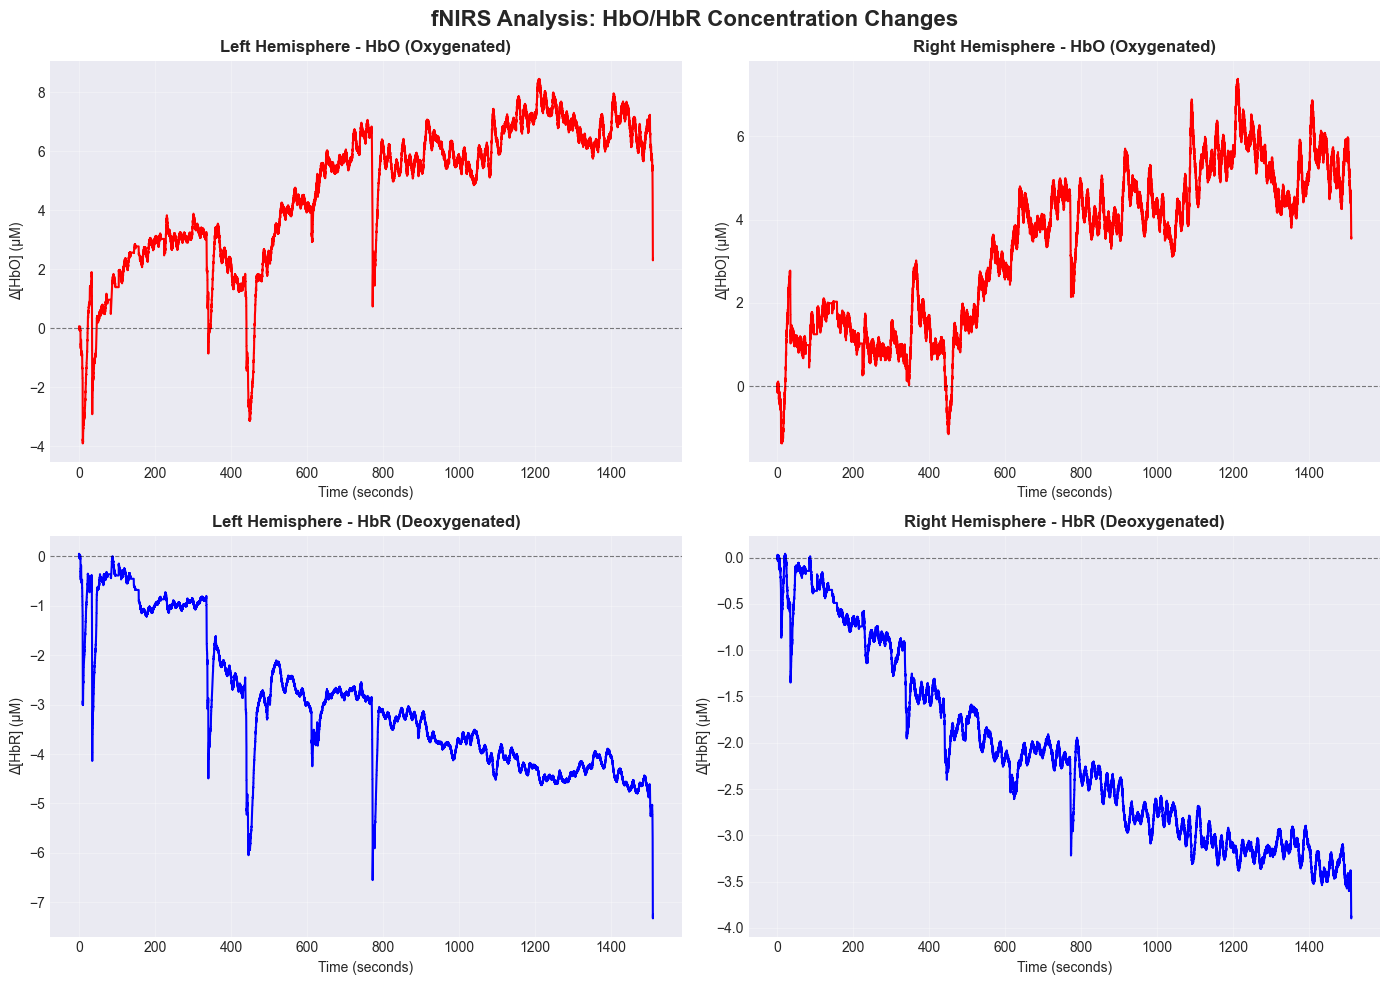

In [4]:
# fNIRS可視化
fig, axes = plot_fnirs(fnirs_results)
plt.show()

### 3.2 Muse App風の可視化

4つの折れ線を重ねて表示（時間軸: 分単位）

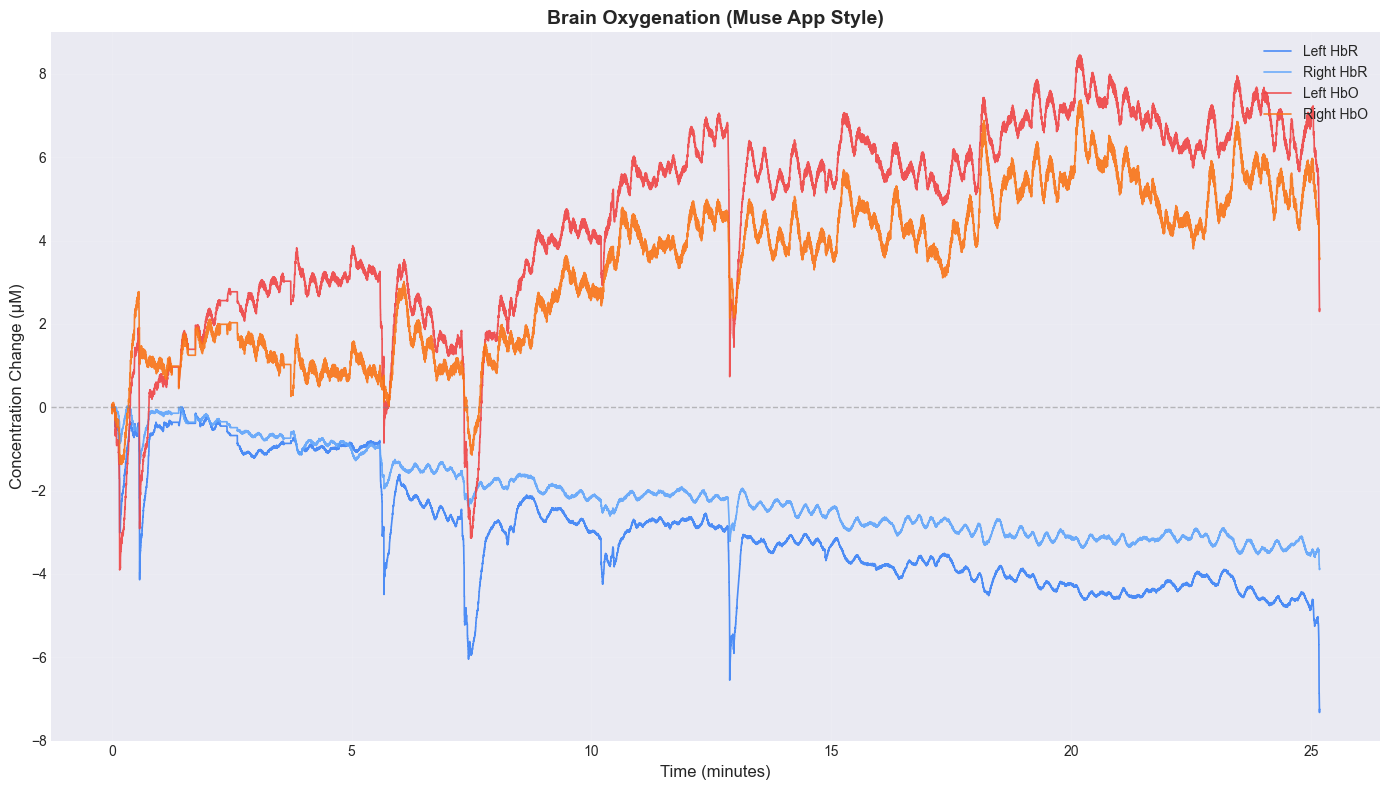

In [5]:
# Muse App風の可視化
fig, ax = plot_fnirs_muse_style(fnirs_results)
plt.show()

## 4. 呼吸数推定

In [6]:
# 心拍数データ取得
hr_data = get_heart_rate_data(df)

# 呼吸数解析実行
print("呼吸数推定中...")
respiratory_results = analyze_respiratory(hr_data)

# 統計情報表示
print("\n=" * 60)
print("呼吸数推定結果")
print("=" * 60)
print(f"RR Interval: {respiratory_results['stats']['rr_mean']:.1f} ± {respiratory_results['stats']['rr_std']:.1f} ms")
print(f"呼吸数 (Welch法): {respiratory_results['stats']['respiratory_rate_welch']:.1f} breaths/min")
print(f"呼吸数 (FFT法): {respiratory_results['stats']['respiratory_rate_fft_mean']:.1f} ± {respiratory_results['stats']['respiratory_rate_fft_std']:.1f} breaths/min")
print("=" * 60)

呼吸数推定中...

=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
呼吸数推定結果
RR Interval: 935.0 ± 63.3 ms
呼吸数 (Welch法): nan breaths/min
呼吸数 (FFT法): 10.3 ± 1.5 breaths/min


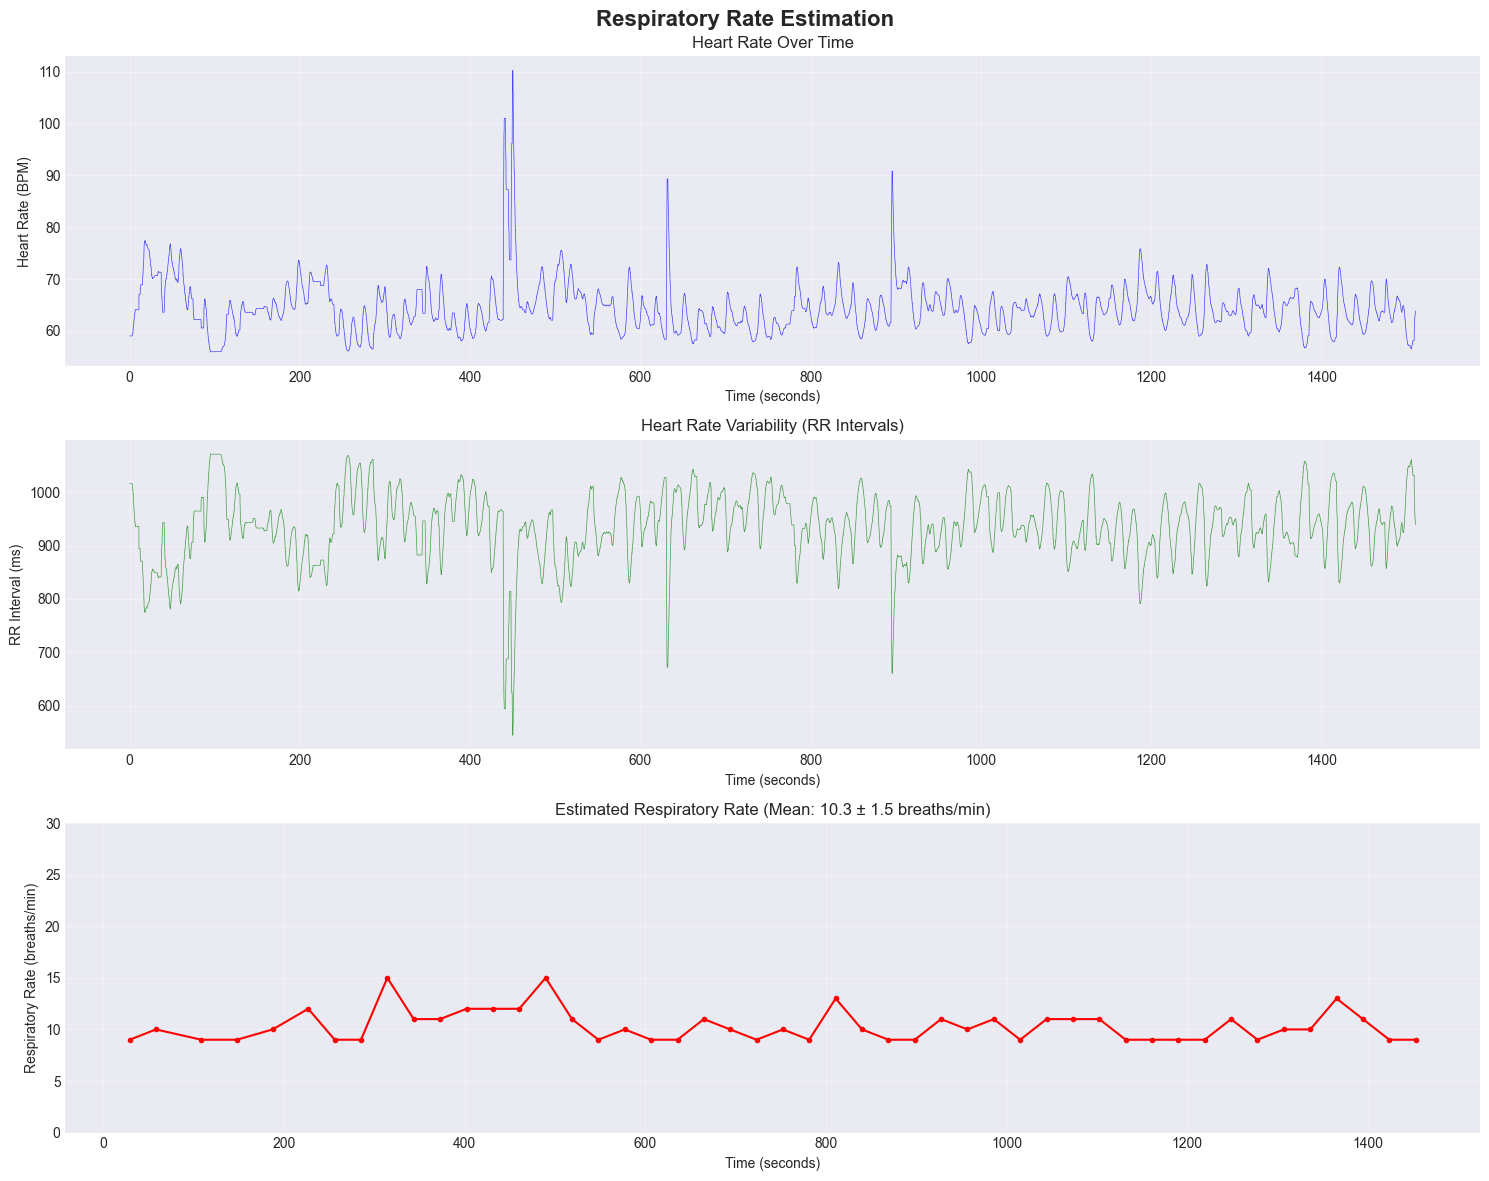

In [7]:
# 呼吸数可視化
fig, axes = plot_respiratory(hr_data, respiratory_results)
plt.show()

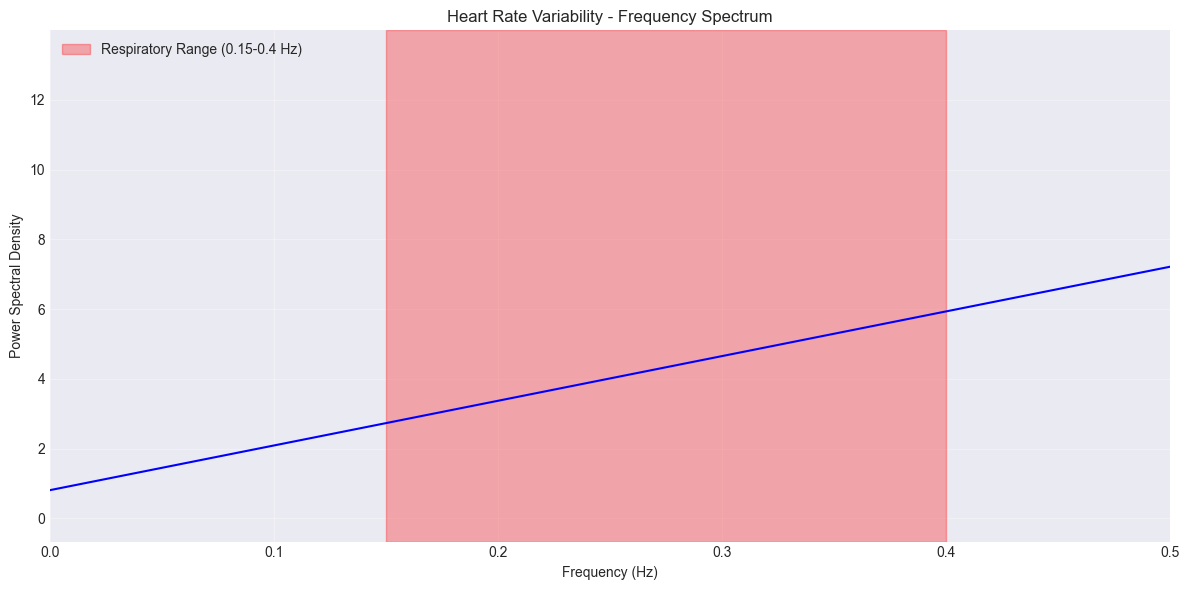

In [8]:
# 周波数スペクトル
fig, ax = plot_frequency_spectrum(respiratory_results)
plt.show()

## 5. 統合ダッシュボード

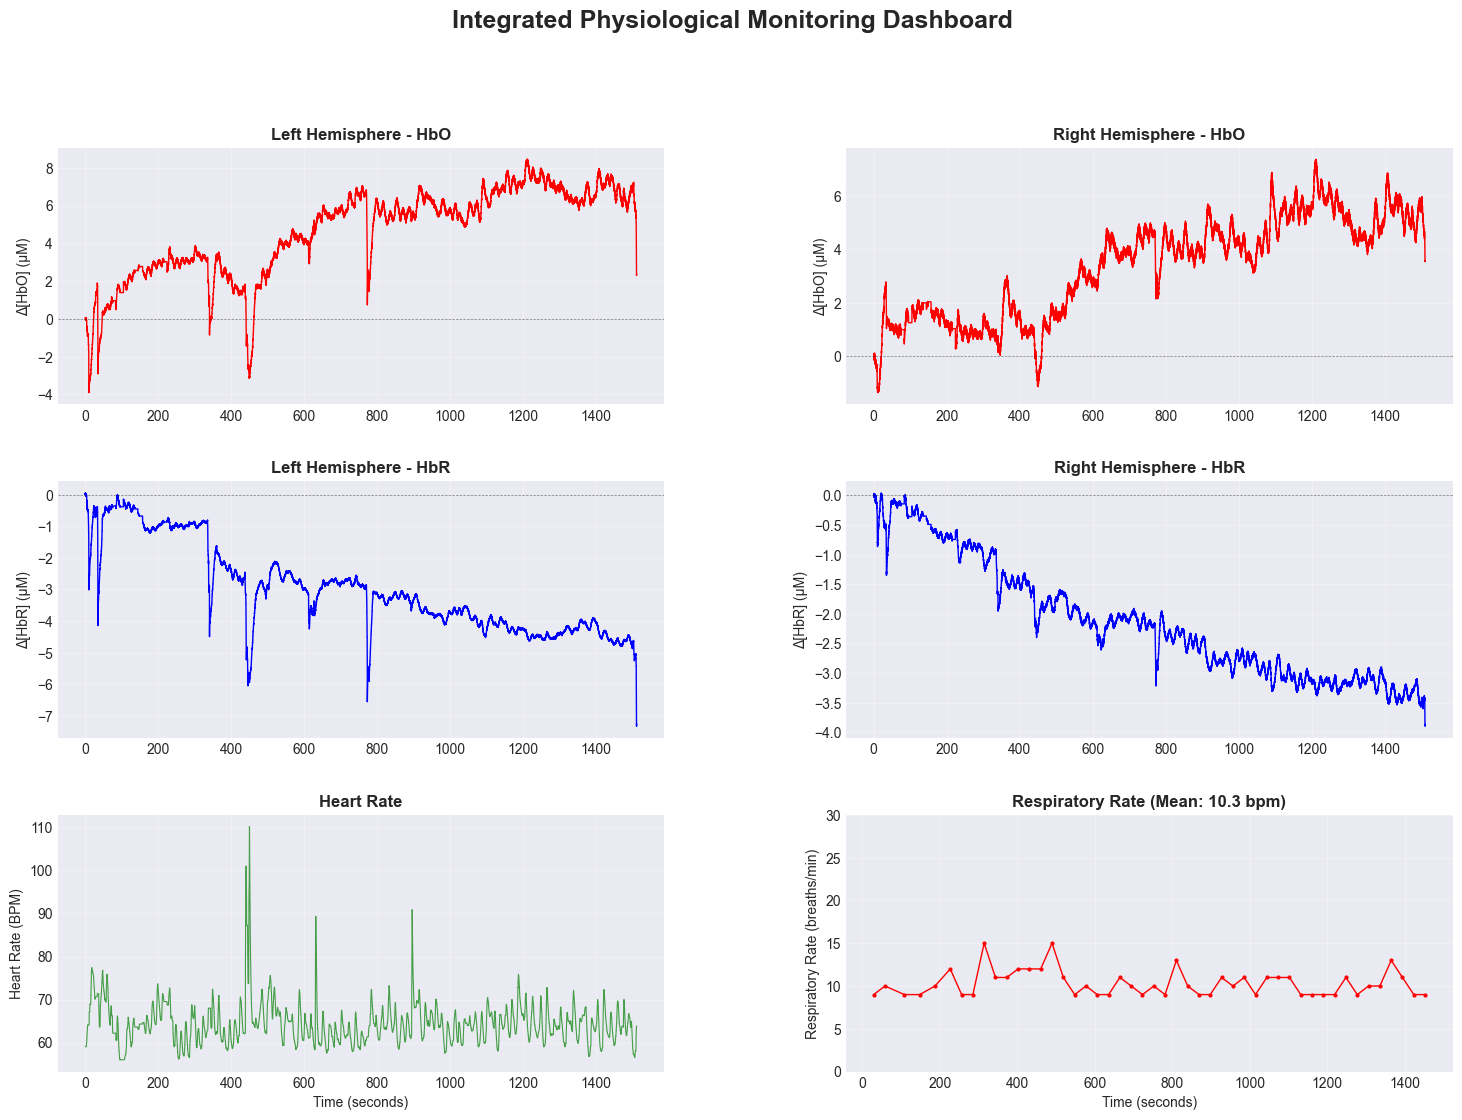

In [9]:
# 統合ダッシュボード
fig, gs = plot_integrated_dashboard(fnirs_results, hr_data, respiratory_results)
plt.show()

## 6. データエクスポート（オプション）

In [10]:
# 解析結果をCSVにエクスポート
output_dir = Path("../output")
output_dir.mkdir(exist_ok=True)

# fNIRSデータ
fnirs_df = pd.DataFrame({
    'time': fnirs_results['time'],
    'left_hbo': fnirs_results['left_hbo'],
    'left_hbr': fnirs_results['left_hbr'],
    'right_hbo': fnirs_results['right_hbo'],
    'right_hbr': fnirs_results['right_hbr'],
})
fnirs_df.to_csv(output_dir / 'fnirs_results.csv', index=False)

# 呼吸数データ
resp_df = pd.DataFrame({
    'time': respiratory_results['time'],
    'heart_rate': hr_data['heart_rate'],
    'rr_interval': respiratory_results['rr_intervals'],
})
resp_df.to_csv(output_dir / 'respiratory_results.csv', index=False)

print(f"\n結果を {output_dir} にエクスポートしました")


結果を ../output にエクスポートしました


## まとめ

このNotebookでは、Mind Monitor (Muse S) のデータから以下を解析しました:

1. **fNIRS解析**: Modified Beer-Lambert LawによるHbO/HbRの計算
2. **心拍変動 (HRV)**: RRインターバルの算出
3. **呼吸数推定**: RSA (Respiratory Sinus Arrhythmia) を利用した周波数解析

ライブラリ化により、計算ロジックと可視化を分離し、再利用性とデバッグ性を向上させました。